<a href="https://colab.research.google.com/github/diegopescoalcalde/portfolio/blob/master/English_San_Francisco_Airbnb_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Airbnb Data Analysis - *San Francisco (USA)*
---
*by [Diego Pesco Alcalde](https://www.linkedin.com/in/diegopesco/)*

<br>

[Airbnb](https://www.airbnb.com.br/) is already considered the **biggest accomodation company in the world**, without having one single hotel!

Connecting travelers that need a place to stay to hosts looking for extra income, Airbnb provides an innovative solution to make everyone happy.

In 2018 the startup founded 10 years before reached the milestone of **300 million costumers**, challenging the traditional hotel corporations.

With so many users it is natural to think that they deal with huge amounts of data. They do not only handle it very well, but also make part of this data available to everyone interested in analyzing it through their website [Inside Airbnb](http://insideairbnb.com/get-the-data.html).


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Using data science libraries from Python I will conduct a simple but interesting analysis of the data available from Airbnb in San Francisco. The objective is to show a couple of questions that can be answered using Data Science, and some of the business opportunities that can be identified and tackled with it.**

## Data Collection

The dataset used in this example was obtained from the website [Inside Airbnb](http://insideairbnb.com/), more especifically, from the file below:

* listings.csv - Summary information and metrics for listings in San Francisco (good for visualisations).


In [ ]:
# import python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:
# import file listings.csv to a DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-francisco/2020-05-06/visualisations/listings.csv")

## Data Reduction and Analysis


In this section the data are visualized and transformed to find relevant information to the project. All analysis must have an objective, and Data Science are not an exception. I will run this analysis to look for opportunities to increase the total monthly rents in the city.


<br>

**Variables**


* id - property ID
* name - property name in the website
* host_id - host ID
* host_name - host name
* neighbourhood_group - subgroups of neighbourhoods
* neighbourhood - neighbourhood name
* latitude - latitude coordinate of the property
* longitude - longitude coordinate of the property
* room_type - room category classification according to Airbnb options
* price - daily rent price
* minimum_nights - minimum nights required for a reservation
* number_of_reviews - total of reviews that a especific property has
* last_review - date of the last review
* reviews_per_month - calculated reviews per month
* calculated_host_listings_count - quantity of properties of the same host
* availability_365 - quantity of days that the property is available in one year

Before we start any analysis, let's check if the data collection was successful by looking at the first rows of the dataset.

In [ ]:
# show 5 first rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,241,2020-03-28,1.83,1,118
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,2017-08-06,0.83,1,0
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,65,32,19,2020-03-06,0.15,9,365
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,65,32,8,2018-09-12,0.12,9,365
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77525,-122.43637,Entire home/apt,714,5,28,2019-06-28,0.22,2,365


### **Data Pre-processing**

Pre-processing data is a critical part to guarantee good results. On this phase the integrity of the dataset is verified and anomalies can be identified and treated. A dataset with problems can generate errors in an automatic code or mislead conclusions when analyzed.

<br>

In order to allow statistical and graphical methods to work properly in the later stages of the analysis it is also important to have the data in a proper format. If the data format is not matching the needs of the study some transformations might be needed.

<br>

Last but not least, the dimension of the dataset is an important parameter to choose among different processing options. Different methods might change drastically the computational costs and results. So this information also needs to be investigated in the beginning.



In [ ]:
# check the dimensions of the dataset
print("Rows:\t {}".format(df.shape[0]))
print("Variables:\t {}".format(df.shape[1]))
print("\n")

# check the type of the data in each variable
display(df.dtypes)

Rows:	 8078
Variables:	 16




id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

For the objective of this example the data types seem adequate. In case different types are needed the modification will be done accordingly.

### **Data Pre-processing - Missing Values**

One of the anomalies that usually need to be addressed is the case of missing values. They can generate errors in mathematical operations or in graphical representations and affect the study.

In [ ]:
# calculate percentage of missing values for each variable
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.235331
last_review                       0.235331
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

Three variables have missing values. There are many different methods to deal with this issue, and many good publications on how to do that, but since the three variables are not important to the objective of the study we will remove these variables from our dataset, as well as "id" and "host_id".

In [ ]:
#Dropping columns that are not needed for the study

df_clean = df.copy()
df_clean.dropna(axis=1, inplace=True)
df_clean.drop(['id', 'host_id'], axis=1, inplace=True)

With a clean dataset, variables in the right formats and a known data volume, it is time to start the practical analysis.

### **Distribution of results** 

The practical analysis is the first step when looking for answers in a problem based on its data. It is the moment where a "sanity check" is made, and the objective is to understand if the data makes sense from a practical perspective. The dimensions and magnitudes of the variables are compatible with the expected? Are there patterns or signs of anomalies? Is there enough data to solve the problem? In many cases this is the step where most of the time is invested to succeed in a project. It is not hard to apply statistical methods or to create graphs, the real challenge in Data Science is to connect the numbers to the reality and decide when and which of these tools will be used.

<br>

Let's take a look at the distribution of the data collected and "see what we see".

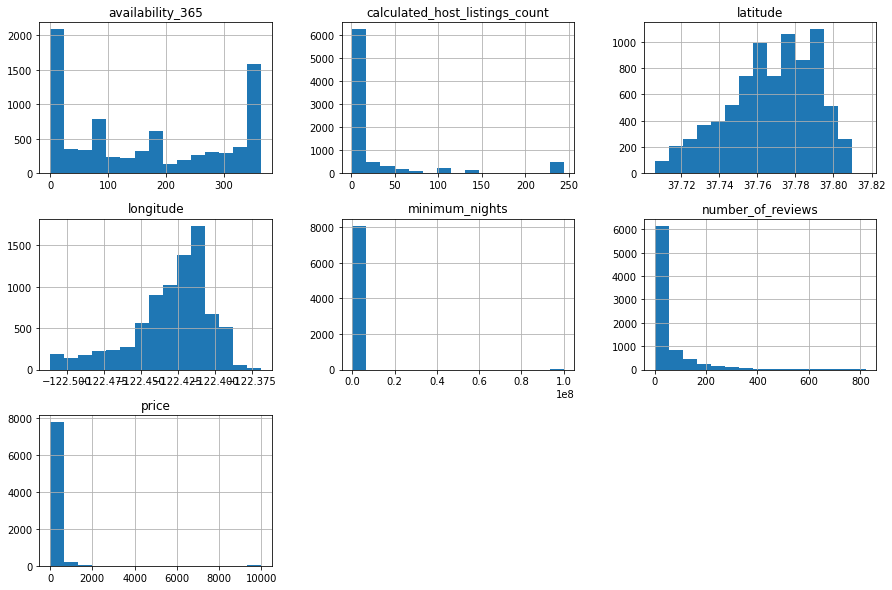

In [ ]:
# Create a histogram of the numerical data
df_clean.hist(bins=15, figsize=(15,10));

It's possible to see strange numbers in pretty much all the variables (a daily rent of approximately US$10000.00, for example). There numbers are not necessarily wrong, but in many case they are not within the inference space of the problem, and impact the observation of the really important data. To avoid that we can remove these rows from the dataset. I will use two outlier estimation methods and verify which one to apply.

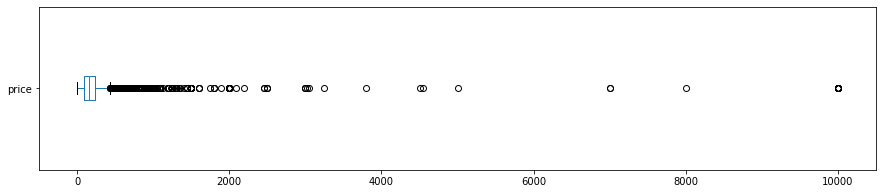


Superior limit using IQR: 432.5

Number of estimated outliers
635 entries
7.8609%

Superior limit using Z-scores: 1876.0801034631074

Number of estimated outliers
51 entries
0.6313%


In [ ]:
# box plot - price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# estimate outliers from Interquartile Range
iqr = df.price.quantile(q=0.75) - df.price.quantile(q=0.25)
suplim1 = df.price.quantile(q=0.75) + (1.5*iqr)

# summary of estimation
print("\nSuperior limit using IQR: {}".format(suplim1))
print("\nNumber of estimated outliers")
print("{} entries".format(len(df[df.price > suplim1])))
print("{:.4f}%".format((len(df[df.price > suplim1]) / df.shape[0])*100))

# estimate outliers from Z-score
suplim2 = df.price.mean() + (3*df.price.std())

# summary of estimation
print("\nSuperior limit using Z-scores: {}".format(suplim2))
print("\nNumber of estimated outliers")
print("{} entries".format(len(df[df.price > suplim2])))
print("{:.4f}%".format((len(df[df.price > suplim2]) / df.shape[0])*100))


The difference in the estimations shows the importance of critical thinking during the analysis. A "one size fits all" mindset is a very risky approach and can lead to wrong conclusions.

Since the objective is to eliminate only very extreme numbers and potential typos, the limit estimated in the second method will be used.

The same procedure will be done for a second variable, "minimum_nights":


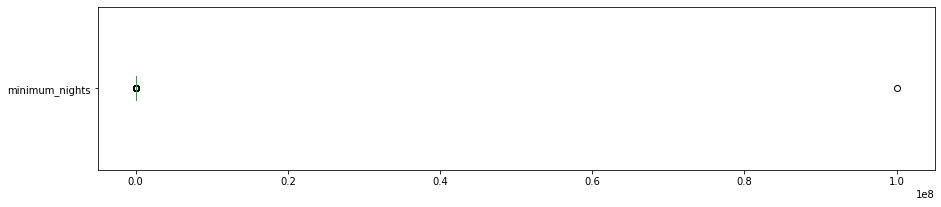


Superior limit using IQR: 72.0

Number of estimated outliers
99 entries
1.2256%

Superior limit using Z-scores: 3350265.869318325

Number of estimated outliers
1 entries
0.0124%


In [ ]:
# box plot - minimum nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# estimate outliers from Interquartile Range
iqr = df.minimum_nights.quantile(q=0.75) - df.minimum_nights.quantile(q=0.25)
suplim3 = df.minimum_nights.quantile(q=0.75) + (1.5*iqr)

# summary of estimation
print("\nSuperior limit using IQR: {}".format(suplim3))
print("\nNumber of estimated outliers")
print("{} entries".format(len(df[df.minimum_nights > suplim3])))
print("{:.4f}%".format((len(df[df.minimum_nights > suplim3]) / df.shape[0])*100))

# estimate outliers from Z-score
suplim4 = df.minimum_nights.mean() + (3*df.minimum_nights.std())

# summary of estimation
print("\nSuperior limit using Z-scores: {}".format(suplim4))
print("\nNumber of estimated outliers")
print("{} entries".format(len(df[df.minimum_nights > suplim4])))
print("{:.4f}%".format((len(df[df.minimum_nights > suplim4]) / df.shape[0])*100))

The existence of a single number wrongly typed distorts the visualization of the graph as well as the outlier calculation using Z scores. Because of that the first method (IQR) will be used as a reference in this case

The Dataset is then modified to eliminate these entries.

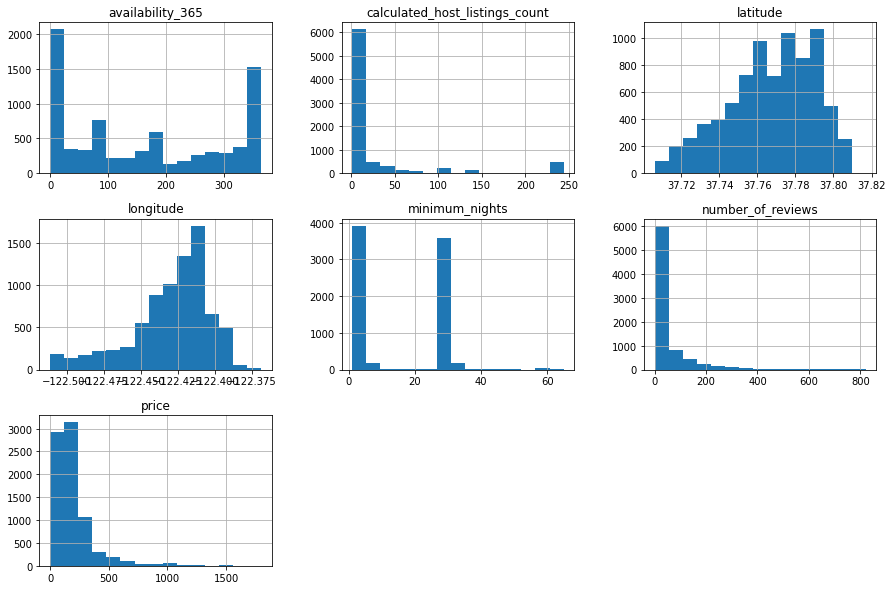

In [ ]:
#Removing rows out of the range of the study

df_clean.drop(df_clean[df_clean.price > suplim2].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > suplim3].index, axis=0, inplace=True)
df_clean.hist(bins=15, figsize=(15,10));

### **What is the average daily rent price?**

Two of the variables that impacts in Airbnb's profit margin are the rent price and demand size. The average rent price is an interesting metric for a project or initiative to adjust margin and demand, and optimize profits. Another possibility is to compare average prices of San Francisco with other cities, and identify business oportunities.

In [ ]:
# average of `price` column
display(df_clean.describe())
print("\n")
print("The average daily rent price is: US${:.2f}".format(df.price.mean()))
print("The average daily rent price after outlier removal is: US${:.2f}".format(df_clean.price.mean()))

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,7930.000000,7930.000000,7930.000000,7930.000000,7930.000000,7930.000000,7930.000000
mean,37.767125,-122.429600,196.969609,15.880832,45.308197,26.413367,163.312863
std,0.022946,0.026904,181.530508,14.247919,82.082192,59.876923,138.739619
min,37.705860,-122.511630,0.000000,1.000000,0.000000,1.000000,0.000000
25%,37.752365,-122.442397,95.000000,2.000000,1.000000,1.000000,20.000000
50%,37.770375,-122.423840,149.000000,6.000000,9.000000,2.000000,146.000000
75%,37.786718,-122.410150,227.750000,30.000000,52.000000,14.000000,309.000000
max,37.817040,-122.368570,1800.000000,65.000000,821.000000,244.000000,365.000000




The average daily rent price is: US$231.39
The average daily rent price after outlier removal is: US$196.97


Can you see the difference that a good pre-processing and practical analysis make? Removing a small portion of the dataset that were not object of our study reduced the estimated average price in approximately 15%.

Even with that, US$196.97 is quite expensive. How are these numbers in other cities, such as L.A., New York or Miami?

### **Is there a strong correlation among the variables?**

Correlation is an important information that can be extracted from the data. With that one can narrow down what seems to be a big problem to a couple variables and this information itself is enough to validate or invalidate many hypotesis.

In [ ]:
# criar uma matriz de correlação
corr=df_clean.corr()
# mostrar a matriz de correlação
display(corr)

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
latitude,1.000000,0.204257,0.117661,0.164579,-0.141315,0.233851,0.040194
longitude,0.204257,1.000000,0.021516,0.103260,-0.147315,0.224252,-0.006631
price,0.117661,0.021516,1.000000,-0.184499,-0.102837,-0.055278,-0.082543
minimum_nights,0.164579,0.103260,-0.184499,1.000000,-0.349442,0.294666,0.317505
number_of_reviews,-0.141315,-0.147315,-0.102837,-0.349442,1.000000,-0.202318,0.006663
calculated_host_listings_count,0.233851,0.224252,-0.055278,0.294666,-0.202318,1.000000,0.044837
availability_365,0.040194,-0.006631,-0.082543,0.317505,0.006663,0.044837,1.000000


The chart below is named Heatmap, and it allows us to see extreme values more easily. It is a very useful tool to check for correlations. In the heatmap we can identify some moderate correlations among the variables, but causality investigation involves critical thinking, as well as some statistical methods that are not in the scope of this example.

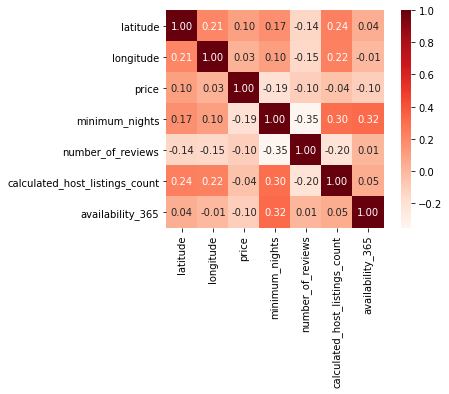

In [ ]:
# create a heatmap from the correlation table
sns.heatmap(corr, cmap='Reds', fmt='.2f', square=True, linecolor='white', annot=True);

### **What is the property type mostly offered in Airbnb?**

Create clusters is probably one of the most useful practices in Data Science. Clusters are easy to create, easy to understand and provide a ton of information (if you know what you are looking for).

Creating clusters of property types we can see how is the distribution of the different options to the costumers.

In [ ]:
# Show the quantity of each property type offered in San Francisco
df_clean.room_type.value_counts()

Entire home/apt    4604
Private room       2836
Shared room         286
Hotel room          101
Name: room_type, dtype: int64

In [ ]:
# See data in percentage values
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.588220
Private room       0.362336
Shared room        0.036540
Hotel room         0.012904
Name: room_type, dtype: float64

The quantity of shared rooms and hotel rooms represent less than 5% of all properties. Why is this important?

This can be a mere reflex of the market demands, or in another words, the lack of demand for this option of accommodation is the reason why there are just a few hosts interested in offering it.

The second possibility is that there is a demand that is not being supplied by Airbnb and the hosts. With a dataset of user research entries Airbnb can easily cross this information and find that out.

### **What is the most expensive neighbourhood in Airbnb?**



The average daily rent price grouped by neighbourhood is helpful in many situations. The owner of a property can check the data to decide whether he/she will become a host, or even to adjust the accommodation rent prices. Tourists can use the information to drive their researches considering the price as a factor to decision-making. Airbnb can use it with recommender algorithms to personalize its platform to each user (what they probably already do).

The comparison will be restricted to neighbourhoods that have at least 30 properties in Airbnb, to avoid having a couple big or small values distorting the results.

In [ ]:
# Get neighbourhoods with at least 30 entries in AirBNB

freq = pd.DataFrame(df_clean.neighbourhood.value_counts())
freq.drop(freq[freq.neighbourhood > 30].index, axis=0, inplace=True)

# Average rent price calculation

meanprice=df_clean.groupby(['neighbourhood']).price.mean()

# Remove locations with elss than 30 properties and list the 10 most expensive

meanprice.drop(freq.index, axis=0, inplace=True)
meanprice.sort_values(ascending=False)[:10]


neighbourhood
Pacific Heights        267.401316
Glen Park              252.103448
Marina                 252.100000
Russian Hill           251.815789
Twin Peaks             246.753846
Castro/Upper Market    237.968750
Noe Valley             228.944984
Potrero Hill           217.465812
North Beach            213.281818
South of Market        209.806988
Name: price, dtype: float64

As expected, many of the top 10 expensive locations are close to tourist places of the city. Let's check that in a map.

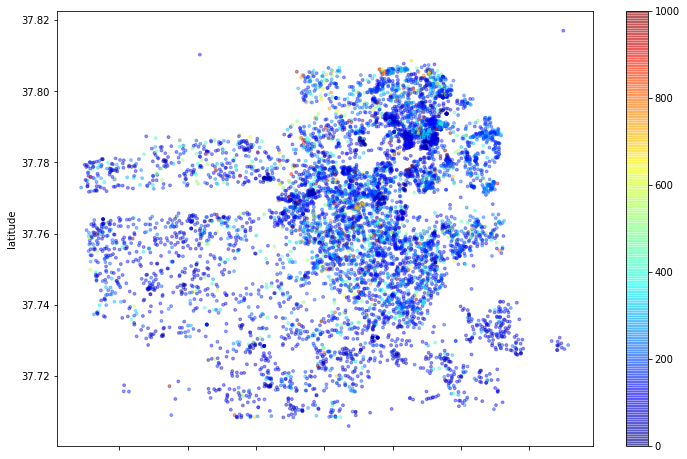

In [ ]:
# plot properties based on latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

In the map it is possible to see not only the distribution of the properties but also their daily rent price. The Northeast region is definetely the one with most options, probably because of the Pier and the Bay Bridge, among other tourist points.

With that information, Airbnb can use its "Experiences" business and incentivate companies in that region to offer their services in the platform. Users can then rent their accommodation and take a discount in a closeby experience, for example. Good for everyone involved.

The high rent price of some properties is distorting the scale range and impacting the analysis of price. Let's adjust the scale.

<function matplotlib.pyplot.tight_layout>

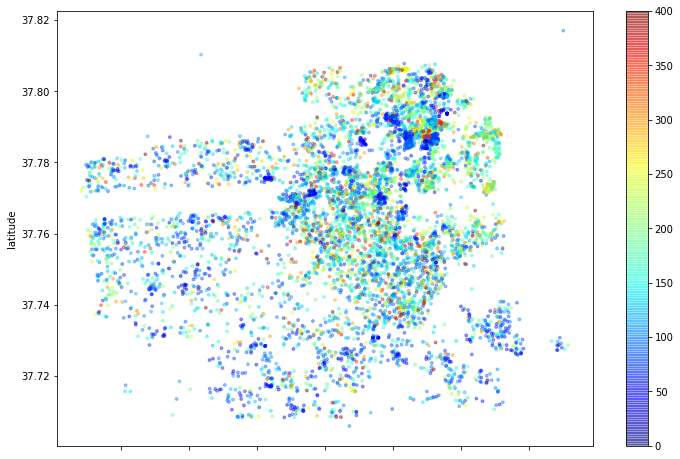

In [ ]:
df_price = df_clean.drop(df_clean[df_clean.price > 400].index, axis=0)
df_price.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_price['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));
plt.xlabel('longitude')
plt.tight_layout

With a more adequate scale we can conclude that despite the high number of units available in the northeast region, it is also where the high prices are mostly concentrated.

However, what is more interesting is the existence of some spots where the prices are much lower there. What could be that? Regions with small apartments? Or maybe some buildings where people rent shared bedrooms? These are investigations that can proceed with this dataset and another clusters analysis.

### **What is the average minimum nights requirement from hosts?**

Many hosts define a minimum nights requirement for people to stay in their properties, as a way to reduce the frequency of visitors and ease the management.

In [ ]:
# Calculate average of `minimum_nights`

df_clean.minimum_nights.mean()

# Converting to a result with practical significance

round(df_clean.minimum_nights.mean())

16

As it was visible in the practical analysis charts, many owners rent in Airbnb with a minimum requirement of 30 days. To another group, the minimum stay of 1 or 2 days is more common. The result of that is an average of 16 days. Here is another example of the importance of a good practical analysis, since 16 is not much representative of this variable, which actually has a systematic effect. Analyzing just the mean value can lead to wrong conclusions about the availability of rental options.

## Conclusions


The example above involves basic steps in the analysis of a Dataset. But it is easy to understand the quantity and diversity of problems that can be solved with just these basic steps when done right.

With such data in hands, Airbnb could conduct projects to:

* Create marketing campaings targetted to owners of properties in especific regions of the city.
* Encourage the offering of more shared bedrooms or hotel rooms, creating more rental options to their costumers and increasing the volume of monthly rents.
* Stimulate the short period offering among hosts, so that more options are available to users visiting the city for a couple days. 
* Look for more experiences opportunities in the Northeast region, and then provide full visitor experiences to their guests at a better price. 

Projects like these in a very touristic city such as San Francisco can easily impact the revenues in **hundreds of thousands of dollars.** 

<br>

Obviously a company such as Airbnb knows well the power of their databases and does not only the analysis done in this example but many others. But many companies with less knowledge of technological solutions have datasets as powerful as the one that we analyzed, and don't use them to drive the decision-making process or to optimize resources. **Data Science was the fundamental basis of Airbnb, Netflix, Google and Facebook**, and more and more smaller companies are embracing this thinking to reach their missions and visions. The presence of Data Scientists in strategic positions allows a change in an organization's culture, and consequently a deployment to all business areas, such as sales, services, marketing and HR. **This has been the key to many startups' success** and soon will become a basic need to the survival of a business model.